###### Ed Bharucha

# Pickle data

In [37]:
import pickle

# Write
# with open ('data/test.pkl', 'wb') as pklfile:
#     pickle.dump(df, pklfile)

# Read
with open ('data/test.pkl', 'rb') as pklfile:
    df = pickle.load(pklfile)
    
with open ('data/test1.pkl', 'rb') as pklfile:
    df1 = pickle.load(pklfile)
    
with open ('data/test2.pkl', 'rb') as pklfile:
    df2 = pickle.load(pklfile)

In [44]:
df3 = df.copy()
df3['winner'] = np.where(df['winner_enc']==df['fighter1_enc'], 1, 2)
df3.drop(columns=['fighter1_enc', 'fighter2_enc', 'winner_enc'], inplace=True)

# Misc

In [125]:
# Accessing index in for loops

l = range(10,30,2)
for idx, val in enumerate(l):
    print (idx, val)

In [126]:
# Aggregating elements across 2 iterables

l1 = [1,2,3,4,5,6,7]
l2 = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']

for val in zip (l1, l2):
    print (val)

(1, 'violet')
(2, 'indigo')
(3, 'blue')
(4, 'green')
(5, 'yellow')
(6, 'orange')
(7, 'red')


In [131]:
# # Progress bar

from tqdm import tqdm_notebook as tqdm

for i in tqdm(range(1000)):
    print (i)

# Encoding categorical data

In [ ]:
import numpy as np
import pandas as pd              
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.DataFrame(
    {
        'Guitar Make': ['Fender', 'Gibson', 'Ibanez', 'Rickenbacker', 'Jackson'],
        'Color': ['Red', 'Black', 'Blue', 'Black', 'Red']
    }
)

In [ ]:
df

In [ ]:
# Label
le = LabelEncoder()
encoded = le.fit_transform(df['Guitar Make'])
encoded

# Ordinal
ce_ord = ce.OrdinalEncoder(cols = ['Guitar Make', 'Color'])
ce_ord.fit_transform(df)

# One-hot
ce_onehot = ce.OneHotEncoder(cols = ['Guitar Make', 'Color'])
ce_onehot.fit_transform(df)

# Binary
ce_binary = ce.BinaryEncoder(cols = ['Guitar Make', 'Color'])
ce_binary.fit_transform(df)

# BaseN
ce_baseN = ce.BaseNEncoder(cols = ['Guitar Make', 'Color'])
ce_baseN.fit_transform(df)

# Hashing
ce_hashing = ce.HashingEncoder(cols = ['Guitar Make', 'Color'])
ce_hashing.fit_transform(df)

# Splitting into Train & Test datasets

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Feature Scaling, Normalization

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

In [39]:
def scale(scaler, data):
  from sklearn.preprocessing import StandardScaler, MinMaxScaler
  
  if (scaler == 'standard'):
    std_scaler = StandardScaler()
    return (std_scaler.fit_transform(data))
  elif (scaler == 'minmax'):
    minmax_scaler = MinMaxScaler(feature_range=(-1,1))
    return (minmax_scaler.fit_transform(data))

In [ ]:
X = scale('standard', df)
# X = scale('minmax', df)

# PCA

In [86]:
def pca (data):
  from sklearn.decomposition import PCA
#   pca = PCA(n_components=10)
  pca = PCA(.95)   # retain 95% of variance
  principalComponents_train = pca.fit_transform(data)
  pac_vars_train = [print (f'{pac_var*100:.2f}%\t', end="") for pac_var in pca.explained_variance_ratio_]
  print ()
  print (f'{np.sum(pca.explained_variance_ratio_)*100:.2f}%')
  return (principalComponents_train)

In [87]:
X_scaled = scale('standard', df3.iloc[:,:-1])
pc = pca(X_scaled)

13.73%	8.76%	6.66%	5.27%	4.92%	4.72%	4.02%	3.86%	3.43%	3.35%	3.10%	2.85%	2.72%	2.60%	2.35%	2.21%	1.98%	1.92%	1.86%	1.82%	1.66%	1.61%	1.57%	1.46%	1.41%	1.38%	1.20%	1.19%	1.10%	1.07%	
95.76%


C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup

for c in list(string.ascii_lowercase):
    fighters_url = f'http://ufcstats.com/statistics/fighters?char={c}&page=all'
    
    page = requests.get(fighters_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    fighters_data = soup.find_all('tr')

    for fighter in fighters_data[2:]:
        fighter_data = fighter.find_all('td')
        first_names.append(fighter_data[0].get_text(strip=True))
        last_names.append(fighter_data[1].get_text(strip=True))
        nick_names.append(fighter_data[2].get_text(strip=True))
        heights.append(fighter_data[3].get_text(strip=True))
        weights.append(fighter_data[4].get_text(strip=True))
        reaches.append(fighter_data[5].get_text(strip=True))
        stances.append(fighter_data[6].get_text(strip=True))
        wins.append(fighter_data[7].get_text(strip=True))
        losses.append(fighter_data[8].get_text(strip=True))
        draws.append(fighter_data[9].get_text(strip=True))
        fighter_urls.append(fighter_data[0].find('a')['href'])
        
fighter_data = pd.DataFrame(
    {
        'first_name' : first_names,
        'last_name' : last_names,
        'nick_name' : nick_names,
        'height' : heights,
        'weight' : weights,
        'reach' : reaches,
        'stance' : stances,
        'wins' : wins,
        'losses' : losses,
        'draws' : draws,
        'fighter_url' : fighter_urls,
    }
)

fighter_data.to_csv('data/fighter_data_base.csv')

# Pandas

In [ ]:
# Create DataFrame

df_fight_card = pd.DataFrame(
    {
        'weight_class' : ["Women's Strawweight", "Welterweight", "Flyweight", "Women's Flyweight", "Middleweight", 
                          "Lightweight"],
        'fighter1' : ["Jessica Andrade", "Li Jingliang", "Kai Kara-France", "Wu Yanan", "Robert Whittaker",
                      "Khabib Nurmagomedov",],
        'fighter2' : ["Weili Zhang", "Elizeu Zaleski dos Santos", "Mark De La Rosa", "Mizuki Inoue", "Israel Adesanya",
                      "Dustin Poirier"],
    }
)

In [ ]:
# Data joins, vLookup

df1 = df1.merge(df2, left_on=['fighter1'], right_on=['full_name'], how='left').\
drop(columns=['first_name', 'last_name', 'nick_name', 'fighter_url'])

df1.rename(columns={'height':'fighter1_height', 'weight':'fighter1_weight', 'reach':'fighter1_reach',\
                                 'stance':'fighter1_stance','wins':'fighter1_wins', 'losses':'fighter1_losses',\
                                 'draws':'fighter1_draws', 'SLpM':'fighter1_SLpM', 'Str_Acc':'fighter1_Str_Acc',\
                                 'SApM':'fighter1_SApM', 'Str_Dep':'fighter1_Str_Dep','TD_Avg':'fighter1_TD_Avg',\
                                 'TD_Acc':'fighter1_TD_Acc', 'TD_Def':'fighter1_TD_Def',\
                                 'Sub_Avg':'fighter1_Sub_Avg','full_name':'fighter1_full_name'}, inplace=True)

In [ ]:
# Copy DataFrame

df3 = df1.copy()

In [ ]:
# Column value based on conditional

df['winner'] = np.where(df['winner_enc']==df['fighter1_enc'], 1, 2)
df.head()

In [ ]:
# Check for NaNs

df.isna().any()

cols_nan = df.columns[df.isna().any()].tolist()

In [110]:
# Slice

df.loc[:6,:]
df.iloc[:6,:]
df.col_0
df['col_0']

In [115]:
# Conditionals

df1['winner_en'] = np.where(df1['winner']==df1['fighter1'], 0, 1)
df1[df1['fighter1'].str.contains('Jessica Andrade')]
df1[df1.fighter1 == 'Jessica Andrade']

,fight_card,fight_card_url,fighter1,fighter2,weight_class,winner,method,round,winner_en
1891,UFC 191: Johnson vs Dodson 2,http://ufcstats.com/event-details/82f5c81f4e3c...,Jessica Andrade,Raquel Pennington,Women's Bantamweight,Raquel Pennington,SUBRear Naked Choke,2,1
1964,UFC Fight Night: Mir vs Duffee,http://ufcstats.com/event-details/36877f0e62b2...,Jessica Andrade,Sarah Moras,Women's Bantamweight,Jessica Andrade,U-DEC,3,0
2818,UFC Fight Night: Machida vs Munoz,http://ufcstats.com/event-details/60884f31ead1...,Jessica Andrade,Rosi Sexton,Women's Bantamweight,Jessica Andrade,U-DEC,3,0


# Cross Validation

## Using KFold, StratifiedKFold

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

In [42]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
folds = StratifiedKFold(n_splits=3)
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

scores_rf = []
scores_logistic = []
scores_svm = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
#     scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
#     scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))

In [7]:
np.mean(scores_rf)

0.47975371116771415

## Using cross_val_score

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# X = np.array(df.iloc[:,:-1])
X = scale('standard', df.iloc[:,:-1])
y = df.iloc[:,-1]


score_rf = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=3)
np.mean(score_rf)

C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.4775419639291152

# ML Classifiers

In [52]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = scale('standard', X_train)
X_test = scale('standard', X_test)

C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=9, max_depth=11, max_features=13)
tree.fit(X_train, y_train)
tree_score = tree.score(X_test, y_test)
print (f'Decision Tree score on test data = {tree_score*100:.2f}%')

y_pred_tree = tree.predict(X_test)

Decision Tree score on test data = 62.64%


In [58]:
# Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42, max_depth=10, max_features=20)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print (f'Random Forrest score on test data = {rf_score*100:.2f}%')

y_pred_rf = rf.predict(X_test)

Random Forrest score on test data = 69.51%


In [88]:
# LightGBM
import lightgbm as lgb

lgb_params = {
                 'boosting_type' : 'dart', 'objective' : 'binary','learning_rate' : 0.1,
                  'n_estimators' : 100,  'max_bin' : 100, 'n_jobs' : 2, 'num_leaves' : 50,
                 }

lgbm = lgb.LGBMClassifier(**lgb_params)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
print (f'LightGBM score on test data = {lgbm_score*100:.2f}%')

y_pred_lgbm = lgbm.predict(X_test)

LightGBM score on test data = 70.82%


# Deep Learning

In [92]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

## Feed Forward NN

In [93]:

def plot_hist(history):
  history_dict=history.history
  loss_values = history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.figure(figsize=(10,6))
  plt.xlabel('Epochs')
  plt.plot(loss_values, color='Blue', linestyle='dashed', marker='o', label='Training Loss')
  plt.plot(val_loss_values,color='Red', label='Validation Loss')
  plt.legend()
  plt.show()

def model1(X, y):
  name = 'Model 1'

  input_shape = X[0].shape

  model = Sequential()
  model.add(Dense(256, input_shape=input_shape, activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam', 
                loss='mean_absolute_error',
                metrics=['mean_absolute_error'])

  # Runs model and assigns it to 'history'
  history = model.fit(X, y, epochs = 200, batch_size=32, validation_split = 0.2, verbose=0)

  y_pred = model.predict(X)
  print(f'{name}: The R2 score on the Train set is:\t{r2_score(y, y_pred):.3f}')
  print(f'{name}: The Mean Absolute Error on the Train set is:\t{mean_absolute_error(y, y_pred):.3f}')
  
  # Plot Training & Validation Loss
  plot_hist(history)
  
  return(model)

W0826 17:59:42.215897 17644 deprecation.py:506] From C:\Users\erb\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model 1: The R2 score on the Train set is:	0.536
Model 1: The Mean Absolute Error on the Train set is:	0.140


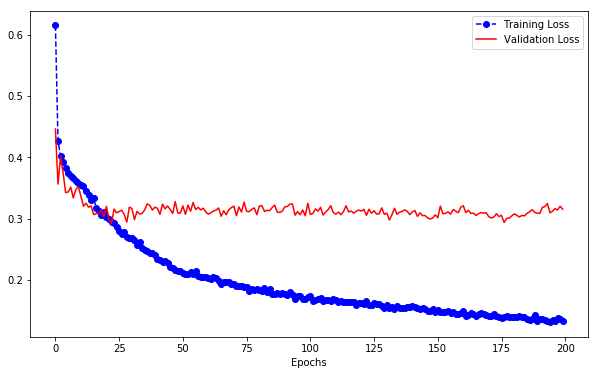

In [94]:
X = scale('standard', df3.iloc[:,:-1])
y = df3.iloc[:,-1]
iters = 1

for iter in range(iters):
  model_1 = model1(X, y)

# Warnings

In [89]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings(action='once')

# Confusion Matrix

Text(78.0, 0.5, 'Truth')

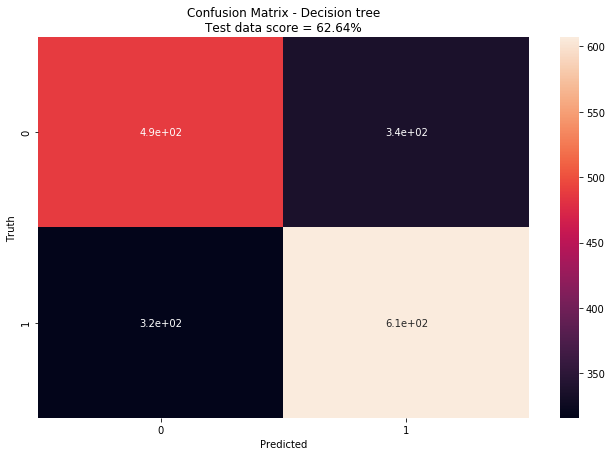

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(11,7))
sn.heatmap(cm_tree, annot=True)
plt.title(f'Confusion Matrix - Decision tree\nTest data score = {tree_score*100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Correlation

In [68]:
import pandas as pd

corr = df3.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')
pd.DataFrame(corr).transpose().style.background_gradient(cmap='coolwarm')

In [72]:
for feature in corr['winner'].iteritems():
  if ((feature[1] >= 0.1) or (feature[1] <= -0.1)):  # Features with +ve or -ve correlation with 'winner' of > 10% 
    print (feature)

('fighter1_reach', -0.13077634171587096)
('fighter1_wins', -0.10771740063562958)
('fighter1_SLpM', -0.16723635950605736)
('fighter1_Str_Acc', -0.12722490036251702)
('fighter1_SApM', 0.10273567399522664)
('fighter1_Str_Dep', -0.1255598076861018)
('fighter1_TD_Avg', -0.1009155611477995)
('fighter1_TD_Acc', -0.11151579166353828)
('fighter1_TD_Def', -0.15885729803047055)
('fighter2_reach', 0.12220136952209837)
('fighter2_wins', 0.14215186296190732)
('fighter2_SLpM', 0.15164609168640605)
('fighter2_Str_Dep', 0.14295830506454596)
('fighter2_TD_Acc', 0.1110638308503504)
('fighter2_TD_Def', 0.1585233727101981)
('winner', 1.0)


# Feature Importance

In [76]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# LightGBM
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    objective='binary', metric='binary_logloss', n_estimators=100, num_leaves=10,
      )
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
print (f'LightGBM score on test data = {lgbm_score*100:.2f}%')

y_pred_lgbm = lgbm.predict(X_test)

LightGBM score on test data = 71.68%


In [82]:
import seaborn as sn

def feature_imp(clf, X):
  threshold = 0.5
  feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])
  feature_imp_sorted = feature_imp.sort_values(by="Value", ascending=False)

  print (f'Threshold = {threshold}')
  print (feature_imp_sorted[feature_imp_sorted['Value'] >= threshold])
  plt.figure(figsize=(15, 12))
  sn.barplot(x="Value", y="Feature", data=feature_imp_sorted)
  plt.title(type(clf))
  plt.show()

Threshold = 0.5
    Value           Feature
36     83     fighter2_wins
35     70   fighter1_losses
34     65     fighter1_wins
33     57   fighter2_losses
32     56     fighter1_SLpM
31     48     fighter1_SApM
30     40    fighter2_reach
29     37     fighter2_SApM
27     36  fighter2_Str_Acc
28     36   fighter2_TD_Def
26     35     fighter2_SLpM
25     35   fighter1_TD_Def
24     33   fighter2_TD_Avg
23     29   fighter1_TD_Acc
22     26  fighter2_Str_Dep
21     26  fighter1_Sub_Avg
20     25  fighter1_Str_Dep
19     24    fighter1_reach
18     22  fighter2_Sub_Avg
17     21   fighter1_TD_Avg
16     20   fighter2_TD_Acc
15     20  fighter1_Str_Acc
14     11             round
13      9   fighter1_height
12      6   fighter1_weight
11      5   fighter2_weight
10      5             col_0
9       4   fighter2_height
8       4    fighter1_draws
7       4             col_2
6       3             col_1
5       2    fighter2_draws
4       2             col_3
3       1             col_5


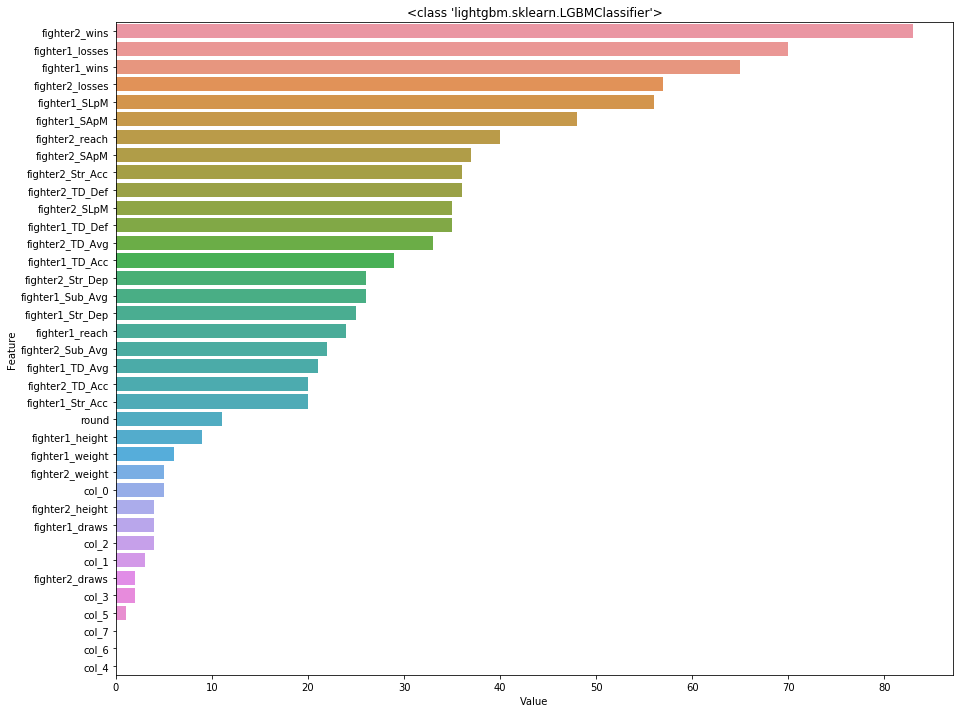

In [83]:
feature_imp(lgbm, X_train)